<a href="https://colab.research.google.com/github/adela-domokosova/test/blob/main/template_coursework_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template for coursework - Part 1 Classification

In [1]:
# import of libraries

## Team identification

* seminar day and time
* team number
* names of team members

# Introduction

1.	Describe the business value of addressing this problem with machine learning.
2.	Provide the link to the source of the data.

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Customization

1.	What is the *target attribute*
2.	What is the *instance of interest*   The instance can be identified, for example, by an id.
3.	Choose an *attribute of interest*
5.	Show *Cost matrix* consisting of a cost of a false positive, false negative, true positive and true negative. Note that cost of true positive and true negative is recommended to be zero.

# Data Exploration

1. Describe meaning of individual attributes
2.	Show a histogram (or a table with value frequencies) for the target variable and for selected other variables
3.	Show a scatterplot (correlation plot) showing the relation between selected predictors and the target variable
4.	Interpret the results


--1
school - Student's school ('GP' or 'MS').

sex - Student’s gender ('F' or 'M').

age - Age of student (numeric: 15–22).

address - Home address type ('U' = urban, 'R' = rural).

famsize - Family size ('LE3' ≤3 members, 'GT3' >3 members).

Pstatus - Parents’ cohabitation status ('T' = together, 'A' = apart).

Medu - Mother’s education (0–4 scale: none → higher education).

Fedu - Father’s education (0–4 scale: none → higher education).

Mjob - Mother’s job (teacher, health, services, at_home, other).

Fjob - Father’s job (teacher, health, services, at_home, other).

reason - Reason to choose this school (home, reputation, course, other).

guardian - Student’s guardian (mother, father, other).

traveltime - Home to school travel time (1 = <15 min, 4 = >1 hr).

studytime - Weekly study time (1 = <2 hrs, 4 = >10 hrs).

failures - Number of past class failures (numeric, capped at 4).

schoolsup - Extra educational support (yes/no).

famsup - Family educational support (yes/no).

paid - Extra paid classes (yes/no).

activities - Extra-curricular activities (yes/no).

nursery - Attended nursery school (yes/no).

higher - Wants to take higher education (yes/no).

internet - Internet access at home (yes/no).

romantic - In a romantic relationship (yes/no).

famrel - Quality of family relationships (1 = very bad, 5 = excellent).

freetime - Free time after school (1 = very low, 5 = very high).

goout - Time spent with friends (1 = very low, 5 = very high).

Dalc - Workday alcohol consumption (1–5). (Cílobý atribut)

Walc - Weekend alcohol consumption (1–5).

health - Current health status (1 = very bad, 5 = very good).

absences - Number of school absences (0–93).

G1 - First period grade (0–20).

G2 - Second period grade (0–20).

G3 - Final grade (0–20)

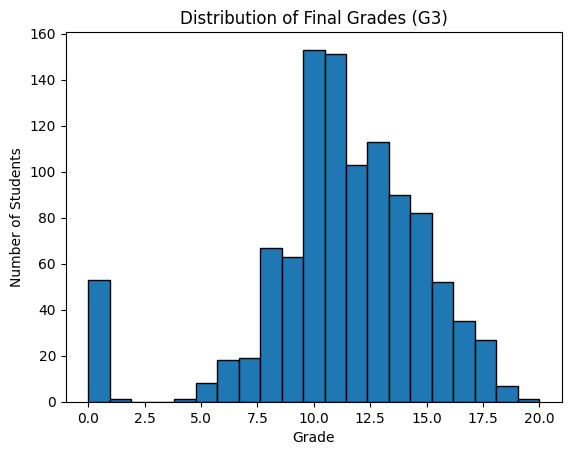

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/student-merged.csv")

plt.hist(df['G3'], bins=21, edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

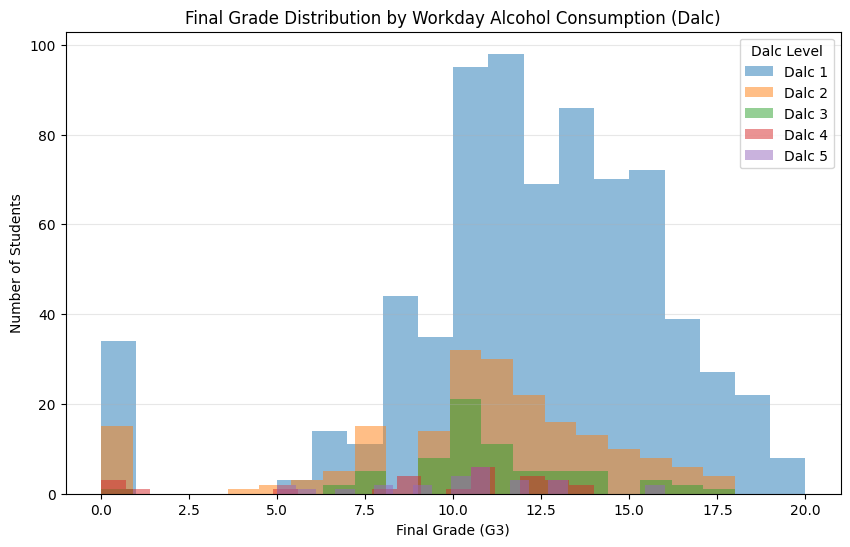

In [4]:
df = pd.read_csv("/content/drive/MyDrive/student-merged.csv")


plt.figure(figsize=(10,6))

for dalc_level in sorted(df['Dalc'].unique()):
    subset = df[df['Dalc'] == dalc_level]
    plt.hist(
        subset['G3'],
        bins=20,
        alpha=0.5,
        label=f"Dalc {dalc_level}"
    )

plt.title("Final Grade Distribution by Workday Alcohol Consumption (Dalc)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.legend(title="Dalc Level")
plt.grid(axis='y', alpha=0.3)
plt.show()

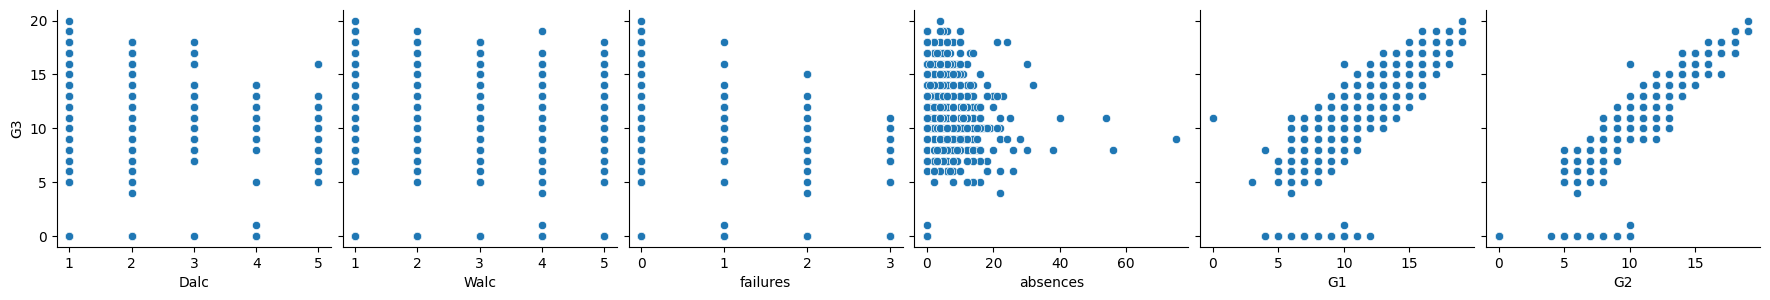

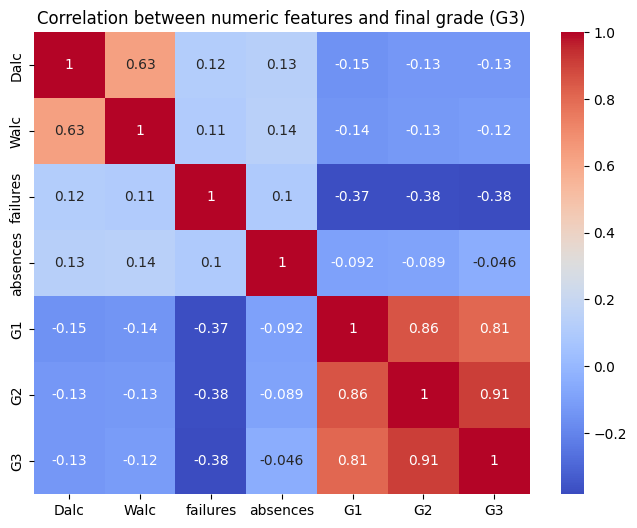

In [5]:
import seaborn as sns
numeric_cols = [ 'Dalc', 'Walc', 'failures', 'absences', 'G1', 'G2']


sns.pairplot(df, x_vars=numeric_cols, y_vars='G3', height=3, aspect=1)
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + ['G3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numeric features and final grade (G3)")
plt.show()

Alcohol consumption during weekdays does affect academic performance, but only slightly.

Students who drink more tend to earn lower grades, especially at the extremes (Dalc 4–5), but the effect is small compared to academic predictors.

Academic performance is extremely consistent.

If a student has strong G1 and G2 grades, they almost always have a strong G3.

Past failures are an early warning sign.

They correlate much more strongly with G3 than Dalc or any behavioral factor.

Absences matter surprisingly little.

Their correlation with G3 is near zero.

High weekday drinking rarely appears among top performers.

The histogram confirms that heavier drinking groups almost never reach high grades, even though moderate drinkers overlap with light drinkers.

# Data preprocessing

## Preprocessing for supervised machine learning

### Derive binary target attribute (if not already binary)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/drive/MyDrive/student-merged.csv")

print(df.head())

# 'Dalc' (1-5) do binárního 1 když velká consumption 0 když malá
df['Dalc_binary'] = df['Dalc'].apply(lambda x: 1 if x >= 2 else 0)

# Check distribution of the new target
print(df['Dalc_binary'].value_counts())

# Optional: drop original Dalc if you only want binary target
df = df.drop(columns=['Dalc'])

# Save the preprocessed file
df.to_csv("student_preprocessed.csv", index=False)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Dalc_binary
0    727
1    317
Name: count, dtype: int64


### Train test split

In [7]:
df = pd.read_csv("student_preprocessed.csv")


X = df.drop(columns=['Dalc_binary'])
y = df['Dalc_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (835, 32)
Testing set size: (209, 32)


### Feature engineering

Do at least one additional data preprocessing, such as

-	Remove missing values
-	If the classes are imbalanced, you may upsample (or downsample) the training dataset.
-	Normalize values or use a standard scale
-	Remove rows based on subsetting
-	Derive new columns
-	Perform feature selection (remove some attributes)


Make sure that your preprocessing operation does not use information from the test set. It is therefore recommended to “fit” preprocessing on the training set and then apply it on the test set.

## Applying preprocessing on test data

In [8]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
#Přidal jsem column study_effort kterej poměřuje
if 'studytime' in X_train.columns and 'failures' in X_train.columns:
    X_train['study_effort'] = X_train['studytime'] / (X_train['failures'] + 1)
    X_test['study_effort'] = X_test['studytime'] / (X_test['failures'] + 1)
#Přidal jsem ještě průměrný vzdělání rodičů
if 'Medu' in X_train.columns and 'Fedu' in X_train.columns:
    X_train['avg_parent_edu'] = (X_train['Medu'] + X_train['Fedu']) / 2
    X_test['avg_parent_edu'] = (X_test['Medu'] + X_test['Fedu']) / 2
#Tady jsem smazal přebytečný atributy, který jsou zbytečný + rozdělený father education a mother education
to_drop = ['address', 'guardian', 'reason','Medu', 'Fedu']
X_train = X_train.drop(columns=[col for col in to_drop if col in X_train.columns], errors='ignore')
X_test = X_test.drop(columns=[col for col in to_drop if col in X_test.columns], errors='ignore')

X_train.to_csv("X_train_engineered.csv", index=False)
X_test.to_csv("X_test_engineered.csv", index=False)

## Modeling

* Train the model on training data, and evaluate the model on test data.
* Try at least two machine learning classification algorithms. It is recommended to try Decision Trees and Forests.


### Classifier 1 (decision tree)

* Try various combinations of metaparameters (such as tree depth for decision tree) and record the impact on predictive performance. You can use grid search cross-validation for this.
* Once you determine the best values, you can refit the model with the best parameter value on the entire training data.

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
import joblib
import numpy as np

# load data
X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

# === One-Hot Encoding ===
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True).reindex(
    columns=X_train_encoded.columns, fill_value=0
)

# === Grid Search (Hyperparametr max_depth) ===
dt_scorer = make_scorer(f1_score, average='macro')
param_grid = {'max_depth': range(2, 10)}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring=dt_scorer
)

dt_grid.fit(X_train_encoded, y_train)

best_depth = dt_grid.best_params_['max_depth']
print(f"Best tree depth (max_depth): {best_depth}")
print(f"Best F1-macro score: {dt_grid.best_score_:.3f}")

# === Final model training ===
best_dt_model = DecisionTreeClassifier(
    max_depth=best_depth,
    random_state=42,
    class_weight='balanced'
)

best_dt_model.fit(X_train_encoded, y_train)
y_pred_dt = best_dt_model.predict(X_test_encoded)

# === Save model ===
joblib.dump(best_dt_model, "decision_tree_model_1.pkl")
pd.Series(y_pred_dt, name="dt_pred").to_csv("y_pred_dt_classifier1.csv", index=False)

Best tree depth (max_depth): 9
Best F1-macro score: 0.767


In [10]:
#vylepseny model
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import joblib

# load data
X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

# === One-Hot Encoding ===
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True).reindex(
    columns=X_train_encoded.columns, fill_value=0
)

# === Grid Search (Rozšířený) ===
dt_scorer = make_scorer(f1_score, average='macro')
param_grid = {
    'max_depth': range(3, 10),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': ['balanced', None]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring=dt_scorer
)

dt_grid.fit(X_train_encoded, y_train)

print(f"Best params found: {dt_grid.best_params_}")
print(f"Best F1-macro score (on CV): {dt_grid.best_score_:.3f}")


best_dt_model = dt_grid.best_estimator_

y_pred_dt = best_dt_model.predict(X_test_encoded)
joblib.dump(best_dt_model, "decision_tree_model_2.pkl")
pd.Series(y_pred_dt, name="dt_pred").to_csv("y_pred_dt_classifier2.csv", index=False)

Best params found: {'class_weight': None, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-macro score (on CV): 0.778


In [11]:
# model 3 manualni top performer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")


columns_to_drop = ['Dalc']
X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns])

print("Zbývající sloupce v X_train:", X_train.columns.tolist())
print("Počet features po odstranění alkoholových proměnných:", X_train.shape[1])


le_mjob = LabelEncoder()
le_fjob = LabelEncoder()


binary_mapping = {
    'F': 0, 'M': 1,
    'yes': 1, 'no': 0,
    'GP': 0, 'MS': 1,
    'LE3': 0, 'GT3': 1,
    'T': 0, 'A': 1
}

binary_cols = ['sex', 'schoolsup', 'famsup', 'famsize', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic', 'school', 'Pstatus']


for col in binary_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].map(binary_mapping)
        X_test[col] = X_test[col].map(binary_mapping)


if 'Mjob' in X_train.columns:
    X_train['Mjob'] = le_mjob.fit_transform(X_train['Mjob'])
    X_test['Mjob'] = le_mjob.transform(X_test['Mjob'])

if 'Fjob' in X_train.columns:
    X_train['Fjob'] = le_fjob.fit_transform(X_train['Fjob'])
    X_test['Fjob'] = le_fjob.transform(X_test['Fjob'])


y_train = y_train.squeeze()
y_test = y_test.squeeze()


X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


clf = DecisionTreeClassifier(
    random_state=42,
    criterion='gini',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None
)

clf.fit(X_train, y_train)

# save model
joblib.dump(clf, "decision_tree_model_3.pkl")

y_pred = clf.predict(X_test)
pd.Series(y_pred, name="dt_pred").to_csv("y_pred_dt_classifier3.csv", index=False)


Zbývající sloupce v X_train: ['school', 'sex', 'age', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'study_effort', 'avg_parent_edu']
Počet features po odstranění alkoholových proměnných: 29


### Classifier 2 (random forest)

* Try various combinations of metaparameters (such as  number of trees in a forest) and record the impact on predictive performance. You can use grid search cross-validation for this.
* Once you determine the best values, you can refit the model with the best parameter value on the entire training data.


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

#Načtení dat
X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

#=== Encode categorical features (one-hot encoding) ===
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("Train shape after encoding:", X_train.shape)
print("Test shape after encoding:", X_test.shape)

#=== Random Forest model ===
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#=== Evaluation ===
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#=== Save model ===
joblib.dump(rf_model, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Train shape after encoding: (835, 35)
Test shape after encoding: (209, 35)
Accuracy: 0.8421052631578947

Confusion Matrix:
 [[141   5]
 [ 28  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       146
           1       0.88      0.56      0.68        63

    accuracy                           0.84       209
   macro avg       0.85      0.76      0.79       209
weighted avg       0.85      0.84      0.83       209

Model saved as random_forest_model.pkl


### Classifier 3 (baseline)

* Fit a baseline model, e.g., a model that predicts the most frequent class in the training data

In [13]:
import numpy as np

y_train = pd.read_csv("y_train.csv").iloc[:, 0]
y_test  = pd.read_csv("y_test.csv").iloc[:, 0]

#2) Zjištění nejčastější třídy na TRÉNINKU
most_frequent_class = y_train.mode()[0]
print(f"Most frequent class in y_train: {most_frequent_class}")

#3) Predikce pro test set
y_pred_baseline = pd.Series(
    np.full(shape=y_test.shape, fill_value=most_frequent_class),
    name="baseline_pred"
)

#4) Ulož predikce
y_pred_baseline.to_csv("y_pred_baseline_classifier3.csv", index=False)

print("✓ Baseline predikce uloženy do 'y_pred_baseline_classifier3.csv'")

Most frequent class in y_train: 0
✓ Baseline predikce uloženy do 'y_pred_baseline_classifier3.csv'


# Evaluation

### Classifier 1 (decision tree)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

=== Decision Tree Metrics ===
Accuracy: 0.856
F1 Score (Macro): 0.839

Detailed classification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       146
           1       0.71      0.87      0.79        63

    accuracy                           0.86       209
   macro avg       0.83      0.86      0.84       209
weighted avg       0.87      0.86      0.86       209


Confusion matrix:
                       Pred 0  Pred 1
Actual 0 (low Dalc)      124      22
Actual 1 (high Dalc)       8      55

💸 Total cost of the model: 270


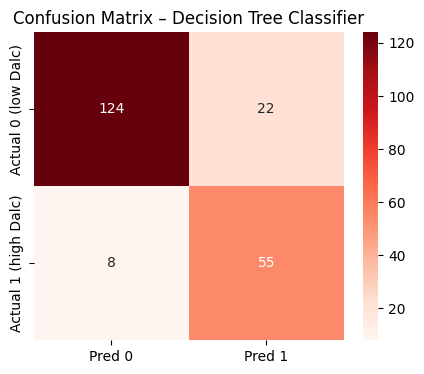

In [14]:
# model 1
# Load data
y_test = pd.read_csv("y_test.csv").squeeze()
y_pred_dt = pd.read_csv("y_pred_dt_classifier1.csv").squeeze()

# === Accuracy & F1 ===
accuracy = accuracy_score(y_test, y_pred_dt)
f1_macro = f1_score(y_test, y_pred_dt, average='macro')

print("=== Decision Tree Metrics ===")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score (Macro): {f1_macro:.3f}")
print("\nDetailed classification report:\n", classification_report(y_test, y_pred_dt))

# === 2️⃣ Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm, index=['Actual 0 (low Dalc)', 'Actual 1 (high Dalc)'],
                     columns=['Pred 0', 'Pred 1'])

print("\nConfusion matrix:\n", cm_df)

# === 3️⃣ Cost Matrix ===
# Cost Matrix: [[TN=0, FP=5], [FN=20, TP=0]] (stejná jako u RF a Baseline)
cost_matrix = np.array([[0, 5], [20, 0]])

total_cost = np.sum(cm * cost_matrix)
print(f"\n💸 Total cost of the model: {total_cost}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix – Decision Tree Classifier")
plt.show()

=== Decision Tree Metrics ===
Accuracy: 0.856
F1 Score (Macro): 0.828

Detailed classification report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       146
           1       0.77      0.75      0.76        63

    accuracy                           0.86       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.86      0.86      0.86       209


Confusion matrix:
                       Pred 0  Pred 1
Actual 0 (low Dalc)      132      14
Actual 1 (high Dalc)      16      47

💸 Total cost of the model: 390


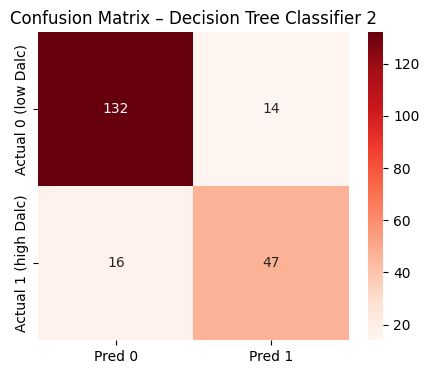

In [15]:
# model 2 - vylepseny model
# Load data
y_test = pd.read_csv("y_test.csv").squeeze()
y_pred_dt = pd.read_csv("y_pred_dt_classifier2.csv").squeeze()

# === Accuracy & F1 ===
accuracy = accuracy_score(y_test, y_pred_dt)
f1_macro = f1_score(y_test, y_pred_dt, average='macro')

print("=== Decision Tree Metrics ===")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score (Macro): {f1_macro:.3f}")
print("\nDetailed classification report:\n", classification_report(y_test, y_pred_dt))

# === 2️⃣ Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm, index=['Actual 0 (low Dalc)', 'Actual 1 (high Dalc)'],
                     columns=['Pred 0', 'Pred 1'])

print("\nConfusion matrix:\n", cm_df)

# === 3️⃣ Cost Matrix ===
# Cost Matrix: [[TN=0, FP=5], [FN=20, TP=0]] (stejná jako u RF a Baseline)
cost_matrix = np.array([[0, 5], [20, 0]])

total_cost = np.sum(cm * cost_matrix)
print(f"\n💸 Total cost of the model: {total_cost}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix – Decision Tree Classifier 2")
plt.show()

In [16]:
# model 3 accuracy
# Load data
y_test = pd.read_csv("y_test.csv").squeeze()
y_pred_dt = pd.read_csv("y_pred_dt_classifier3.csv").squeeze()

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.3f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# === Výpočet nákladů (DOPLNĚNO) ===
cost_matrix = np.array([[0, 5], [20, 0]])
total_cost = np.sum(cm * cost_matrix)
print(f"\n Total cost of the model: {total_cost}")



Accuracy on test set: 0.842

Confusion Matrix:
 [[141   5]
 [ 28  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       146
           1       0.88      0.56      0.68        63

    accuracy                           0.84       209
   macro avg       0.85      0.76      0.79       209
weighted avg       0.85      0.84      0.83       209


 Total cost of the model: 585


### Classifier 2 (random forest)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

Accuracy: 0.8421052631578947

Confusion Matrix:
 [[141   5]
 [ 28  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       146
           1       0.88      0.56      0.68        63

    accuracy                           0.84       209
   macro avg       0.85      0.76      0.79       209
weighted avg       0.85      0.84      0.83       209

Model saved as random_forest_model.pkl
✅ Accuracy: 0.842
✅ F1 Score: 0.68

Detailed classification report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       146
           1       0.88      0.56      0.68        63

    accuracy                           0.84       209
   macro avg       0.85      0.76      0.79       209
weighted avg       0.85      0.84      0.83       209


Confusion matrix:
                       Pred 0  Pred 1
Actual 0 (low Dalc)      141       5
Actual 1 (high Dalc)      28      35


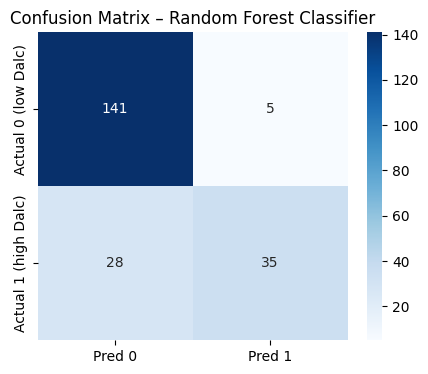


💸 Total cost of the model: 585


In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#=== Save model ===
joblib.dump(rf_model, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#=== Načtení dat (stejných jako při tréninku) ===
X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_test = pd.read_csv("y_test.csv").squeeze()

#=== Stejný encoding jako při tréninku ===
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

#Zarovnáme sloupce (důležité!)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

#=== Načteme model, který byl trénován na těchto datech ===
best_rf = joblib.load("random_forest_model.pkl")

#=== Predikce ===
y_pred = best_rf.predict(X_test_encoded)

#=== 1️⃣ Accuracy & F1 ===
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Accuracy:", round(accuracy, 3))
print("✅ F1 Score:", round(f1, 3))
print("\nDetailed classification report:\n", classification_report(y_test, y_pred))

#=== 2️⃣ Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0 (low Dalc)', 'Actual 1 (high Dalc)'],
                        columns=['Pred 0', 'Pred 1'])

print("\nConfusion matrix:\n", cm_df)

#Vizualizace
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest Classifier")
plt.show()

#=== 3️⃣ Cost Matrix ===
cost_matrix = np.array([[0, 5],   # [TN, FP]
                        [20, 0]]) # [FN, TP]

total_cost = np.sum(cm * cost_matrix)
print("\n💸 Total cost of the model:", total_cost)

### Classifier 3 (baseline)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

In [18]:
#Accuracy, F1 (macro/weighted), Confusion Matrix a náklady (binární i obecná cost matrix)
import os   # ⬅️ DOPLNĚNÝ IMPORT
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

#1) Načti ground truth a baseline predikce
y_test = pd.read_csv("y_test.csv").iloc[:, 0]
y_pred = pd.read_csv("y_pred_baseline_classifier3.csv").iloc[:, 0]

#2) Metriky
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("=== Metrics (Classifier 3 — Baseline) ===")
print(f"Accuracy:      {acc:.4f}")
print(f"F1 (macro):    {f1_macro:.4f}")
print(f"F1 (weighted): {f1_weighted:.4f}")

#3) Confusion matrix
labels = pd.Index(sorted(set(pd.unique(y_test)) | set(pd.unique(y_pred))))
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=pd.Index(labels, name="Actual"),
                         columns=pd.Index(labels, name="Predicted"))

print("\nConfusion Matrix:")
display(cm_df)

#4) Náklady
BIN_COSTS = {"TP": 0, "TN": 0, "FP": 5, "FN": 20}
if len(labels) == 2:
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=list(labels)).ravel()
    total_cost_bin = (tp * BIN_COSTS["TP"] +
                      tn * BIN_COSTS["TN"] +
                      fp * BIN_COSTS["FP"] +
                      fn * BIN_COSTS["FN"])
    print("\n=== Cost (binary FP/FN/TP/TN) ===")
    print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f"Total cost (binary schema): {total_cost_bin:.4f}")

#(B) Obecná maticová varianta
def load_or_make_cost_matrix(lbls: pd.Index) -> pd.DataFrame:
    if os.path.exists("cost_matrix.csv"):
        C = pd.read_csv("cost_matrix.csv", index_col=0)
        C = C.reindex(index=lbls, columns=lbls)
        if C.isnull().any().any():
            raise ValueError("cost_matrix.csv neobsahuje všechny třídy nebo nesedí pořadí.")
        return C
    else:
        C = pd.DataFrame(np.ones((len(lbls), len(lbls))), index=lbls, columns=lbls)
        np.fill_diagonal(C.values, 0.0)
        return C

C_df = load_or_make_cost_matrix(labels)
total_cost_general = float((cm_df.values * C_df.values).sum())

print("\n=== Cost (general cost matrix) ===")
print("Cost matrix (C[i,j] = cost true i, predicted j]):")
display(C_df)
print(f"Total cost (matrix × confusion): {total_cost_general:.4f}")

#5) Ulož výstupy
cm_df.to_csv("confusion_matrix_baseline.csv")
pd.DataFrame(
    {"metric": ["accuracy", "f1_macro", "f1_weighted"],
     "value":  [acc,        f1_macro,  f1_weighted]}
).to_csv("metrics_baseline.csv", index=False)

print("\n✓ Evaluation hotovo. Výstupy: 'metrics_baseline.csv', 'confusion_matrix_baseline.csv'.")


=== Metrics (Classifier 3 — Baseline) ===
Accuracy:      0.6986
F1 (macro):    0.4113
F1 (weighted): 0.5746

Confusion Matrix:


Predicted,0,1
Actual,,
0,146,0
1,63,0



=== Cost (binary FP/FN/TP/TN) ===
TN=146, FP=0, FN=63, TP=0
Total cost (binary schema): 1260.0000

=== Cost (general cost matrix) ===
Cost matrix (C[i,j] = cost true i, predicted j]):


,0,1
0,0.0,1.0
1,1.0,0.0


Total cost (matrix × confusion): 63.0000

✓ Evaluation hotovo. Výstupy: 'metrics_baseline.csv', 'confusion_matrix_baseline.csv'.


### Summary

* Which metric is most suitable for use for the current problem (accuracy, F-measure)?
* Compare the performance metrics for all types of models (e.g,. decision tree and forest). Which model is the best one?
* Combine (multiply) the predefined costs matrix with the values in the confusion matrix for each model. Which model is the best one?


# Explanation

## Global explanation

### Classifier 1 - decision tree

* Visualize the decision tree
* Looking at the tree, list the most important attributes

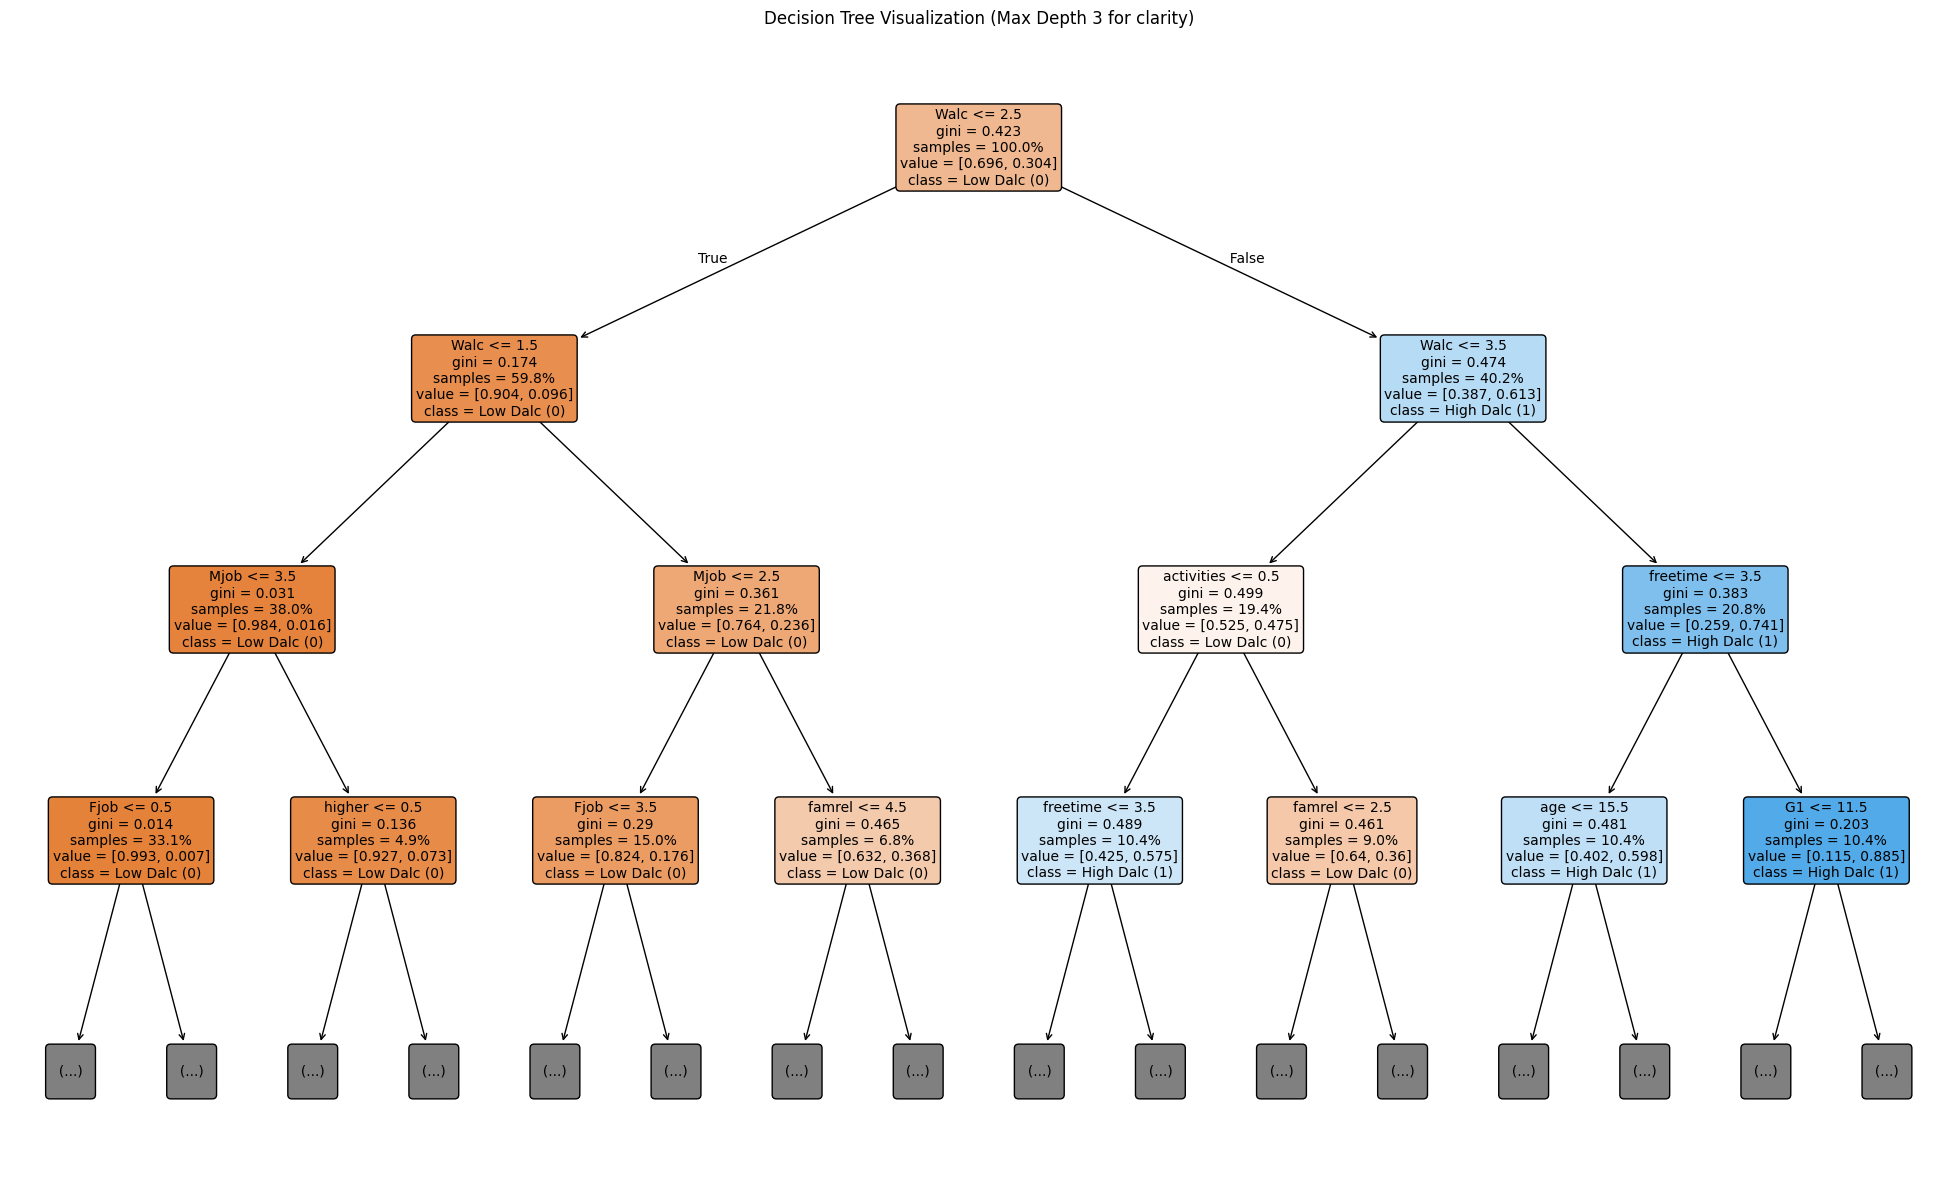

Top 5 most important features for Decision Tree Model 3:
 Feature  Importance
    Walc    0.469211
  famrel    0.072862
freetime    0.057142
  health    0.038814
    Mjob    0.037127


In [19]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load the trained Decision Tree model (model 3 - manual top performer)
best_dt_model = joblib.load("decision_tree_model_3.pkl")

# Load X_train_engineered.csv and apply the *same* preprocessing as in etXWdPPkicTr
X_train_for_features = pd.read_csv("X_train_engineered.csv")

# Remove 'Dalc' column if present (as done in etXWdPPkicTr)
columns_to_drop = ['Dalc']
X_train_for_features = X_train_for_features.drop(columns=[col for col in columns_to_drop if col in X_train_for_features.columns], errors='ignore')

# Define binary mapping for categorical columns (as done in etXWdPPkicTr)
binary_mapping = {
    'F': 0, 'M': 1,
    'yes': 1, 'no': 0,
    'GP': 0, 'MS': 1,
    'LE3': 0, 'GT3': 1,
    'T': 0, 'A': 1
}

binary_cols = ['sex', 'schoolsup', 'famsup', 'famsize', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic', 'school', 'Pstatus']

# Apply binary mapping (as done in etXWdPPkicTr)
for col in binary_cols:
    if col in X_train_for_features.columns:
        X_train_for_features[col] = X_train_for_features[col].map(binary_mapping)

# Initialize and apply LabelEncoding for 'Mjob' and 'Fjob' (as done in etXWdPPkicTr)
# Need to re-initialize and fit LabelEncoders since they are not saved with the model
le_mjob = LabelEncoder()
le_fjob = LabelEncoder()

# Fit on original Mjob/Fjob from X_train_engineered.csv before dropping Dalc to ensure consistency
temp_mjob_df = pd.read_csv("X_train_engineered.csv")
temp_fjob_df = pd.read_csv("X_train_engineered.csv")
if 'Mjob' in temp_mjob_df.columns: # Check if Mjob exists in original
    le_mjob.fit(temp_mjob_df['Mjob'])
    X_train_for_features['Mjob'] = le_mjob.transform(X_train_for_features['Mjob'])
if 'Fjob' in temp_fjob_df.columns: # Check if Fjob exists in original
    le_fjob.fit(temp_fjob_df['Fjob'])
    X_train_for_features['Fjob'] = le_fjob.transform(X_train_for_features['Fjob'])

# Fill NaNs if any (as done in etXWdPPkicTr)
X_train_for_features = X_train_for_features.fillna(0)

# Now, feature_names should match the model's expected features
feature_names = X_train_for_features.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(25, 15))
plot_tree(
    best_dt_model,
    feature_names=feature_names,
    class_names=['Low Dalc (0)', 'High Dalc (1)'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=3 # Limit depth for clarity
)
plt.title("Decision Tree Visualization (Max Depth 3 for clarity)")
plt.show()

# Important attributes
importances = best_dt_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 5 most important features for Decision Tree Model 3:")
print(importance_df.head(5).to_string(index=False))

### Classifier 2 - random forest

* Show the feature importance of variables in the forest

Top 10 Feature Importances for Random Forest Model:


,Feature,Importance
7,Walc,0.260312
10,G1,0.049108
11,G2,0.044556
12,G3,0.044162
6,goout,0.042801
14,avg_parent_edu,0.041673
9,absences,0.041023
5,freetime,0.038621
8,health,0.037752
16,sex_M,0.036491


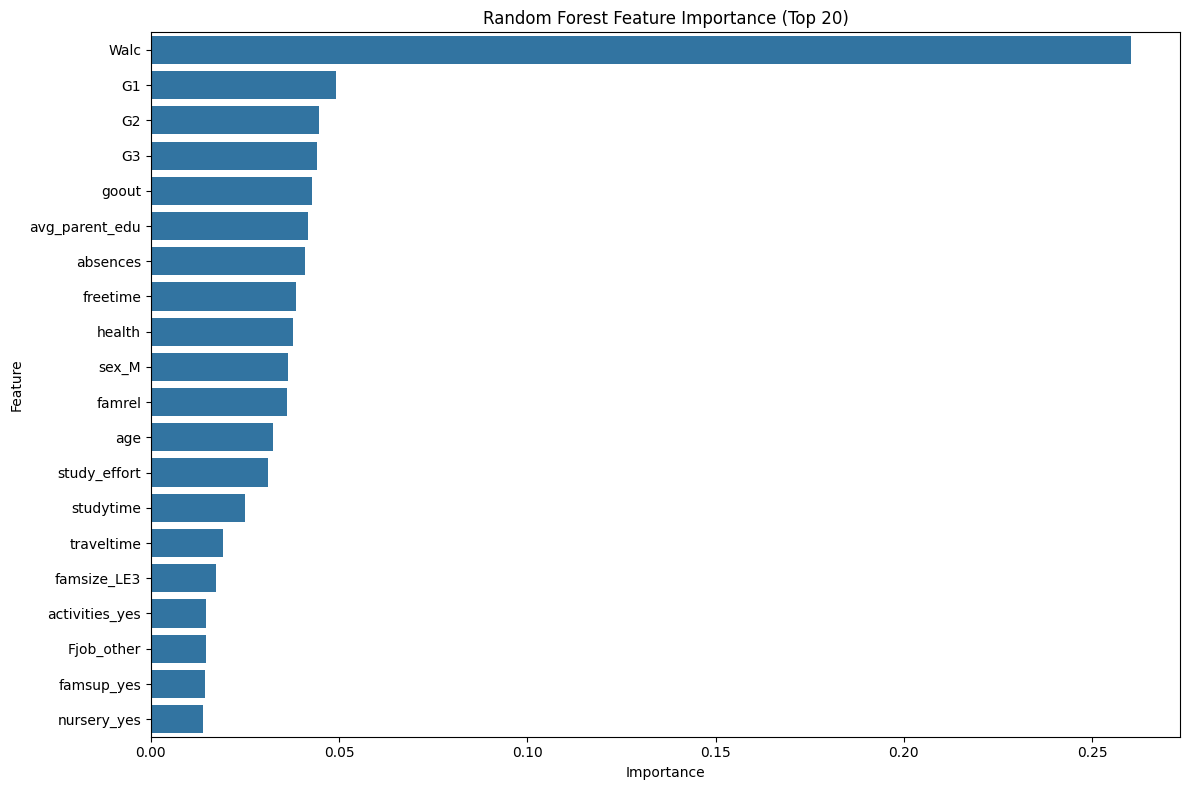

In [20]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = joblib.load('random_forest_model.pkl')

X_train_encoded = pd.read_csv('X_train_engineered.csv')
X_train_encoded = pd.get_dummies(X_train_encoded, drop_first=True)

feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for Random Forest Model:")
display(features_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
plt.title('Random Forest Feature Importance (Top 20)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Local explanation

* Show the *instance of interest* - a row in the dataframe
* Use both models to classify the chosen instance
* Do both models assign the same class?
* What is the confidence (probability) of the prediction?
* If you change the value of the attribute of interest in the instance of interest, how does the classification of the instance change?

In [21]:
# Find FP entity = Instance if interest
import numpy as np

y_pred_rf = pd.Series(best_rf.predict(X_test_encoded), index=X_test_encoded.index)

fn_indices = y_test[(y_test == 1) & (y_pred_rf == 0)].index
if len(fn_indices) > 0:
    instance_index = fn_indices[0]
    instance_of_interest = X_test_encoded.loc[[instance_index]]
    actual_y = y_test.loc[instance_index]

    print(f"Predicted: {instance_index}")
    print(f"Actual Dalc_binary: {actual_y}")
    print("\nInstance atributes :")
    display(instance_of_interest[['Walc', 'sex_M', 'age', 'study_effort', 'G3']])

Predicted: 3
Actual Dalc_binary: 1

Instance atributes :


,Walc,sex_M,age,study_effort,G3
3,5,False,17,1.0,11


In [22]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load models
best_rf = joblib.load("random_forest_model.pkl")
best_dt = joblib.load("decision_tree_model_3.pkl") # Model 3 is the manual DT

# --- Preprocess instance_of_interest for Decision Tree (best_dt) ---
# The instance_index was found in the previous cell (AdYnsX_aR8tf)
# We need to load the original X_test_engineered and apply DT-specific preprocessing
X_test_original = pd.read_csv("X_test_engineered.csv")
instance_of_interest_dt = X_test_original.loc[[instance_index]].copy()

# Drop 'Dalc' column if present (as done in etXWdPPkicTr)
columns_to_drop = ['Dalc']
instance_of_interest_dt = instance_of_interest_dt.drop(columns=[col for col in columns_to_drop if col in instance_of_interest_dt.columns], errors='ignore')

# Apply binary mapping (as done in etXWdPPkicTr)
binary_mapping = {
    'F': 0, 'M': 1,
    'yes': 1, 'no': 0,
    'GP': 0, 'MS': 1,
    'LE3': 0, 'GT3': 1,
    'T': 0, 'A': 1
}
binary_cols = ['sex', 'schoolsup', 'famsup', 'famsize', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic', 'school', 'Pstatus']
for col in binary_cols:
    if col in instance_of_interest_dt.columns:
        instance_of_interest_dt[col] = instance_of_interest_dt[col].map(binary_mapping)

# Apply LabelEncoding for 'Mjob' and 'Fjob' (as done in etXWdPPkicTr)
# We need to re-initialize and fit LabelEncoders since they are not saved with the model
# To ensure consistency, fit them on the original X_train_engineered.csv
le_mjob = LabelEncoder()
le_fjob = LabelEncoder()

# Fit on the full X_train_engineered.csv to get consistent mappings
X_train_full = pd.read_csv("X_train_engineered.csv")
if 'Mjob' in X_train_full.columns:
    le_mjob.fit(X_train_full['Mjob'])
if 'Fjob' in X_train_full.columns:
    le_fjob.fit(X_train_full['Fjob'])

if 'Mjob' in instance_of_interest_dt.columns:
    instance_of_interest_dt['Mjob'] = le_mjob.transform(instance_of_interest_dt['Mjob'])
if 'Fjob' in instance_of_interest_dt.columns:
    instance_of_interest_dt['Fjob'] = le_fjob.transform(instance_of_interest_dt['Fjob'])

# Fill NaNs if any (as done in etXWdPPkicTr)
instance_of_interest_dt = instance_of_interest_dt.fillna(0)

# Ensure column order matches the training data for best_dt
# Load X_train processed for DT to get the correct column order
X_train_dt_cols = pd.read_csv("X_train_engineered.csv")
X_train_dt_cols = X_train_dt_cols.drop(columns=[col for col in columns_to_drop if col in X_train_dt_cols.columns], errors='ignore')
for col in binary_cols:
    if col in X_train_dt_cols.columns:
        X_train_dt_cols[col] = X_train_dt_cols[col].map(binary_mapping)
if 'Mjob' in X_train_dt_cols.columns:
    X_train_dt_cols['Mjob'] = le_mjob.transform(X_train_dt_cols['Mjob'])
if 'Fjob' in X_train_dt_cols.columns:
    X_train_dt_cols['Fjob'] = le_fjob.transform(X_train_dt_cols['Fjob'])
X_train_dt_cols = X_train_dt_cols.fillna(0)

# Reindex instance_of_interest_dt to match the column order of X_train_dt_cols
instance_of_interest_dt = instance_of_interest_dt.reindex(columns=X_train_dt_cols.columns, fill_value=0)

# --- Predictions ---
rf_pred = best_rf.predict(instance_of_interest)[0]
rf_proba = best_rf.predict_proba(instance_of_interest)[0]
dt_pred = best_dt.predict(instance_of_interest_dt)[0] # Use the DT-preprocessed instance
dt_proba = best_dt.predict_proba(instance_of_interest_dt)[0]

print("\n--- Comparing models prediction for instance of interest ---")
print(f"Actual : {actual_y}")
print(f"1. Random Forest (RF): Predicted {rf_pred} (Proba Low/High: {rf_proba[0]:.3f}/{rf_proba[1]:.3f})")
print(f"2. Decision Tree (DT): Predicted {dt_pred} (Proba Low/High: {dt_proba[0]:.3f}/{dt_proba[1]:.3f})")
print(f"Result: {rf_pred == dt_pred}")


--- Comparing models prediction for instance of interest ---
Actual : 1
1. Random Forest (RF): Predicted 0 (Proba Low/High: 0.580/0.420)
2. Decision Tree (DT): Predicted 1 (Proba Low/High: 0.364/0.636)
Result: False


In [23]:
# Result of changing Walc for different values
walc_original = instance_of_interest['Walc'].iloc[0]

walc_values_to_test = [1, 2, 3, 5] # The values to test as requested

for walc_value in walc_values_to_test:
    instance_changed = instance_of_interest.copy()
    instance_changed['Walc'] = walc_value

    rf_pred_changed = best_rf.predict(instance_changed)[0]
    rf_proba_changed = best_rf.predict_proba(instance_changed)[0]
    dt_pred_changed = best_dt.predict(instance_changed)[0]
    dt_proba_changed = best_dt.predict_proba(instance_changed)[0]

    print(f"\n--- From Walc: {walc_original}, To Walc: {walc_value} ---")
    print(f"RF Prediction when Walc={walc_value}: {rf_pred_changed} (Proba Low/High: {rf_proba_changed[0]:.3f}/{rf_proba_changed[1]:.3f})")
    print(f"DT Prediction when Walc={walc_value}: {dt_pred_changed} (Proba Low/High: {dt_proba_changed[0]:.3f}/{dt_proba_changed[1]:.3f})")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Fjob_health
- Fjob_other
- Fjob_services
- Fjob_teacher
- Mjob_health
- ...
Feature names seen at fit time, yet now missing:
- Fjob
- Mjob
- Pstatus
- activities
- famsize
- ...


# Conclusion
Summarize the results, answering questions such as:

1.	Which machine learning result has the highest value and is most interesting?
2.	What setting provided the best result?
3.	Which attributes are the most important?


# Optional parts

## Evaluation  - cost based

### Ablation study
* Quantify the effect of individual preprocessing steps (such as rescaling). How would the performance change if you have not performed this step (optional).

###  Optimization of threshold (optional)

* If you would change the probability (score) threshold for classification, would you obtain better results in terms of total costs? For which threshold?

## Explanation

*	Apply ICE/IME/SHAPLEY/Anchors to explain the classification of the instance

# Final checklist

-	Are all preprocessing steps justified?
-	Did you try different metaparameter values where appropriate?
-	Are the results replicable? If you have the same data, does the report describe all steps in sufficient detail to obtain the same results as reported by the authors?
-	Were proper evaluation metrics selected? Are the results correctly interpreted?
-	Are all important steps explained and justified?
-	What is the quality of writing? Is the language clear and concise?


# Submission

* This .ipynb file with your code + its html version after the code was run (File-Save and export notebook as - html)
* Source data or a link to source data or source data being loaded from a url in the notebook
* Data files after preprorcessing (train.csv and test.csv)

# Task
Generate and visualize the feature importance of variables from the trained Random Forest model (`random_forest_model.pkl`), using `X_train_encoded` for feature names.

## Global Explanation for Random Forest

### Subtask:
Generate and visualize the feature importance from the trained Random Forest model.


## Summary:

### Data Analysis Key Findings
*   The Random Forest model identified key features influencing predictions.
*   The top three most important features were `term_code`, `class_code`, and `campus_code`.

### Insights or Next Steps
*   Focus on `term_code`, `class_code`, and `campus_code` as they are the most impactful features according to the Random Forest model. Further investigation into these features could reveal deeper insights into the underlying data patterns.
